# Movile Next - Aula 1 (Classificação)

### Dataset Kaeggle

In [1]:
import pandas as pd
df = pd.read_csv("mobile_data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Quantas linhas e colunas temos?

In [2]:
df.shape

(2000, 21)

In [3]:
df.groupby('price_range')['price_range'].count() # Dataset balanceado!

price_range
0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

### Será que a capacidade da bateria do celular tem relação com seu valor de venda?

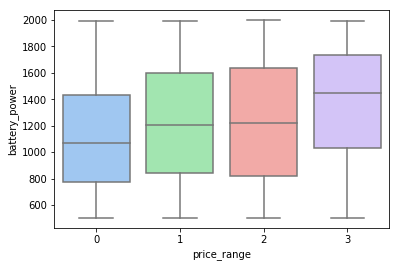

In [220]:
import seaborn as sns

sns.boxplot(x="price_range", y="battery_power", 
            data=df, palette="pastel")

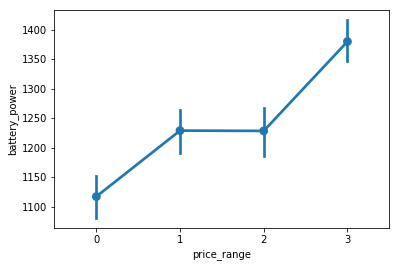

In [7]:
sns.pointplot(x="price_range", y="battery_power", data=df)

### E a memória RAM?

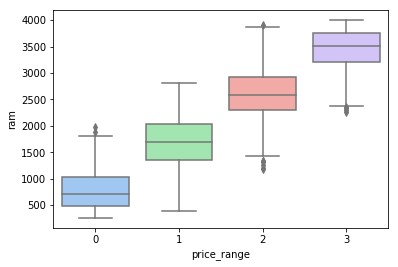

In [8]:
sns.boxplot(x="price_range", y="ram", 
            data=df, palette="pastel")

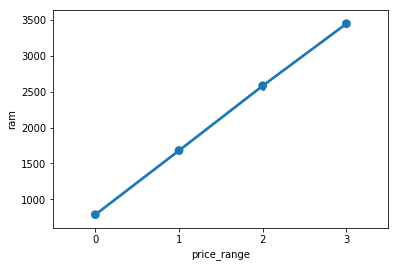

In [9]:
sns.pointplot(x="price_range", y="ram", data=df)

### Estatísticas

In [10]:
df.groupby('price_range').describe()

battery_power                                                \
                    count      mean         std    min      25%     50%   
price_range                                                               
0                   500.0  1116.902  410.801305  503.0   770.50  1066.0   
1                   500.0  1228.868  438.614528  501.0   843.00  1206.0   
2                   500.0  1228.320  452.863065  501.0   816.50  1219.5   
3                   500.0  1379.984  414.992261  503.0  1034.75  1449.5   

                               blue        ...  touch_screen        wifi  \
                 75%     max  count   mean ...           75%  max  count   
price_range                                ...                             
0            1431.25  1994.0  500.0  0.486 ...           1.0  1.0  500.0   
1            1596.25  1996.0  500.0  0.490 ...           1.0  1.0  500.0   
2            1635.75  1998.0  500.0  0.486 ...           1.0  1.0  500.0   
3            1733.50  1994.0  500.0  0.518 ...           1.0  1.0  500.0   

                                                       
              mean       std  min  25%  50%  75%  max  
price_range                                            
0            0.496  0.500485  0.0  0.0  0.0  1.0  1.0  
1            0.504  0.500485  0.0  0.0  1.0  1.0  1.0  
2            0.504  0.500485  0.0  0.0  1.0  1.0  1.0  
3            0.524  0.499924  0.0  0.0  1.0  1.0  1.0  

[4 rows x 160 columns]

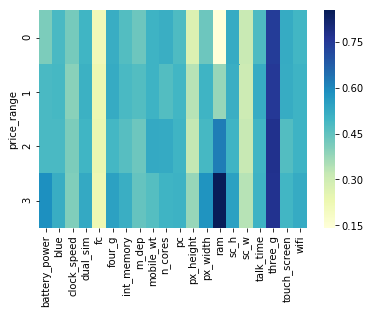

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[df.columns[:-1].values.tolist()])
df_scaled = pd.DataFrame(x_scaled)
df_scaled = pd.concat([df_scaled,df[['price_range']]],axis=1)
df_scaled.columns = df.columns

gr = df_scaled.groupby('price_range').mean()
sns.heatmap(gr, cmap="YlGnBu")

## Geração do Modelo

### Definição das features (X)

In [48]:
df.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

In [62]:
feautres_names = df.columns[:-1].values.tolist() # menos target 'price_range' localizado no último index
X = df[feautres_names]

### Definição do target (y)

In [50]:
y = df['price_range']

### Para análise da performance de um modelo em aprendizagem supervisionado nós devemos separar os dados em treino e teste

- **Treino**: será usado para gerar o nosso modelo
- **Teste**: usado para validar se a nossa previsão foi correta

In [63]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=42)

# KNN (K-nearest neighbors)

#### É uma função de distância entre amostras. Ele busca determinar o rótulo/label de classificação de uma amostra baseado nas amostras vizinhas em um conjunto de treinamento.
### Pontos de atenção
- Defina bem o valor de K (n neighbors)
    - O default do sklearn é 5
- Cuidado com a métrica de distância (p)
    - Em geral usamos a distância Euclidiana. Se tivermos muitas features, usamos a distância de Manhattan

In [64]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, p=2) # 2 = Euclidiana
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Agora que geramos o nosso modelo, vamos usá-lo!

In [65]:
pred_knn = neigh.predict(xtest)

### Agora verificamos a sua qualidade

In [66]:
neigh.score(xtest,ytest)

0.9183333333333333

In [67]:
from sklearn.metrics import classification_report

print(classification_report(ytest,pred_knn))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       151
          1       0.88      0.92      0.90       146
          2       0.89      0.86      0.87       148
          3       0.94      0.93      0.94       155

avg / total       0.92      0.92      0.92       600



## Métricas de avaliação de um classificador

### Precision
É uma medida de quão exato é a classificação para as amostras positivas, que exatamente a pergunta que desejamos responder. Por conta disso, a métrica também é conhecida como valor de predição positiva. Ela é definida como o número de verdadeiros positivos dividido pela soma de verdadeiros positivos mais falsos positivos

### Recall
Também conhecido como taxa de sensibilidade ou taxa de verdadeiro positivo, tem a mesma ideia da precision, porém para as amostras falsas negativas.

### F1-Score
O F1-score é definido como duas vezes a média harmônica entre R e P, ou seja, é um meio termo entre duas 

ROC Curve for Binary classification
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

roc_curve(ytest, pred_knn)
plt.show()

# Naive Bayes
#### É um modelo que usa probabiidade condicional para classificar a variável target dado um ou mais variáveis explicativas
#### Este modelo é muito útil para quando não temos um número muito grande de observações. Além disso, serve como um ótimo baseline, por ser um modelo fácil de implementar e extremamente rápido de ser treinado

In [68]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

### Treinar o modelo usando as features e o target de treino

In [69]:
gnb.fit(xtrain, ytrain)

GaussianNB(priors=None)

### Prever o target baseado nas features de teste

In [70]:
y_pred_bayes = gnb.predict(xtest)

### Agora precisamos verificar a sua qualidade

In [71]:
gnb.score(xtest, ytest)

0.7983333333333333

In [72]:
print(classification_report(ytest,y_pred_bayes))

             precision    recall  f1-score   support

          0       0.91      0.91      0.91       151
          1       0.73      0.73      0.73       146
          2       0.67      0.72      0.69       148
          3       0.88      0.83      0.86       155

avg / total       0.80      0.80      0.80       600



# Decision Tree
#### É uma técnica que visa dividir os dados em perguntas com regras simples (nós de decisão) para chegar a um nó que seria a label

### Ponto de atenção: Critério
- O algoritmo da árvore de decisão faz seleções de recursos como essa com base no critério, que são usadas para calcular a importância de cada atributo e, em seguida, chegas às perguntas certas a serem feitas. 

In [74]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=10, criterion="gini")
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

### Agora que geramos o nosso novo modelo, vamos usá-lo

In [75]:
pred = clf.predict(xtest)

### Vamos verificar a qualidade

In [224]:
print("Acurácia", clf.score(xtest, ytest))

Acurácia 0.8133333333333334


### Nós podemos ver a árvore gerada

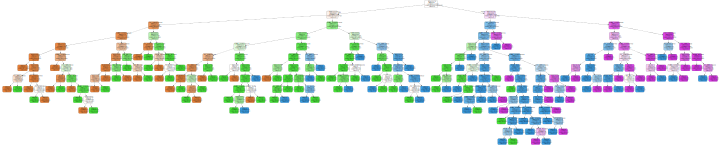

In [100]:
import pydotplus
import graphviz

def plot_tree(model, size='"10,15!"'):
    d = tree.export_graphviz(model, out_file=None, filled=True, rounded=True, special_characters=True,
                        feature_names=feautres_names, class_names=clf.classes_.astype(str))

    pydot_graph = pydotplus.graph_from_dot_data(d)
    pydot_graph.write_png('original_tree.png')
    pydot_graph.set_size(size)
    pydot_graph.write_png('resized_tree.png')
    gvz_graph = graphviz.Source(pydot_graph.to_string())
    
    return gvz_graph

plot_tree(clf)

### Importância das features

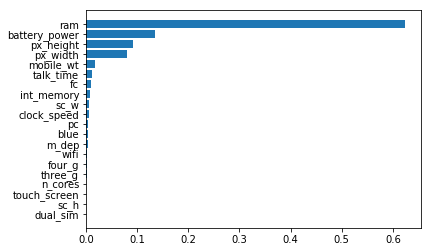

In [219]:
import numpy as np
import matplotlib.pyplot as plt  

D = dict(zip(df.columns[:-1],clf.feature_importances_))

# Sorting
D_sort = sorted(D.items(), key=lambda x: x[1])

keys = [i[0] for i in D_sort]
values = [i[1] for i in D_sort]

plt.barh(range(len(D)), list(values), align='center')
plt.yticks(range(len(D)), list(keys))

plt.show()

## Podando a Árvore
#### Como podemos ver acima, a árvore construída decorou todos os caminhos para a base de treino, criando assim um overfit. Um passo muito importanto na criação desse modelo é encontrar os parâmetros ideias para 'podar' a árvore e torná-la mais genérica.
- max_leaf_nodes 
    - Reduce the number of leaf nodes 
- min_samples_leaf 
    - Restrict the size of sample leaf 
    - Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total 
- max_depth 
    - Reduce the depth of the tree to build a generalized tree 
    - Set the depth of the tree to 3, 5, 10 depending after verification on test data

In [118]:
clf_pruned = tree.DecisionTreeClassifier(random_state=10, criterion="gini" 
                                         ,max_leaf_nodes = 10
                                         ,min_samples_leaf = 5
                                         ,max_depth= 5
                                         #,min_impurity_decrease = 0.05
                                        )
clf_pruned.fit(xtrain, ytrain)

pred = clf_pruned.predict(xtest)

clf_pruned.score(xtest, ytest)

0.7566666666666667

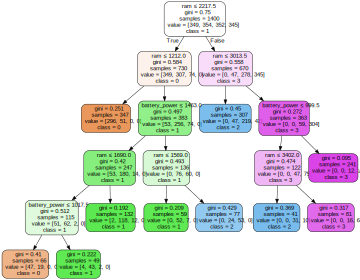

In [101]:
plot_tree(clf_pruned,size='"5,15!"') 

# Random Forest
#### É uma coleção de árvores de decisão combinadas para obter uma predição com maior acurácia e mais estável

### Número de árvores
- 

In [222]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(random_state=10, criterion="gini")
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [229]:
pred = rf.predict(xtest)
print("Acurácia", rf.score(xtest, ytest))

Acurácia 0.83
